<h2 style="color: white; background-color: #466df4; margin: 20px 0; padding: 30px 15px; border-radius: 4px;">
    🪙 South African Trade Balance Optimization: Impact of Trading Partners 💹
</h2>
<h4 style="color: black; background-color: #f5f7f9; margin: 20px 0; padding: 30px 15px; border-radius: 4px;">
    ✔️Done By: Khululiwe Hlongwane
    <span style="font-size: smaller; font-style: italic; float: right;">© ExploreAI 2024 - QCTO - Workplace Module</span>
</h4>

<img src="img/Balance-of-Trade.jpg" alt="Balance of Trade" style="display: block; width: 100%; max-height: 350px; object-fit: cover; border-radius: 4px; margin: 20px 0;">


<hr>
<h2 style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; text-align: center; border-radius: 4px;"> Table of Contents</h2>
<hr style="border: none; border-top: 0.1px solid black; height: 0.1px;">
<a href=#cont> Back to Table of Contents</a>


<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>
    



<a id="BC"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; text-align: center; padding-left: 15px; border-radius: 4px;"> Background Context</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

South Africa's trade balance is a critical economic indicator that reflects the nation's economic health and global competitiveness. A <span style="color:green;">positive</span> trade balance, where exports exceed imports, is generally considered favorable as it indicates a strong domestic economy and attractive export market. Conversely, a <span style="color:red;">negative</span> trade balance can lead to economic vulnerabilities, including currency depreciation and increased debt.

Gross Domestic Product (GDP) is a fundamental measure of a country's economic health, influencing policymaking and business strategies.
Accurate GDP forecasting using trade data enables proactive responses to economic shifts, informed policy adjustments, and strategic planning.


The primary objective of this project is to analyze South Africa's trade balance over time to understand factors influencing fluctuations and develop predictive models for GDP forecasting. This involves:
   1. **Identifying Key Trends**: Pinpointing significant turning points (years) in South Africa's trade balance, highlighting periods of stability or significant shifts.
   <br/>
   
   2. **Developing Predictive Models**: Constructing machine learning models to forecast future trends in exports and imports, empowering policymakers to make proactive decisions.
   <br/>
   
   3. **Optimizing Economic Strategies**: Providing data-driven insights to policymakers and businesses to optimize economic strategies, such as diversifying export markets, promoting import substitution, and implementing policies that stimulate economic growth.


<span style="color:blue;">Null Hypothesis (H₀):</span>

**H₀**: There is no significant correlation between changes in the trade balance and changes in South Africa's GDP. Here it is implied that changes in the trade balance do not have a significant impact on South Africa's economic growth.

<span style="color:blue;">Alternative Hypothesis (H₁):</span>

**H₁**: There is a significant correlation between changes in the trade balance and changes in South Africa's GDP. This suggests that changes in the trade balance have a significant impact on South Africa's economic growth.

<a id="one"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">1. Importing Packages</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

* This section imports all the required libraries for data manipulation, visualization, and modeling.
---

In [71]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Libraries for visualization
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

# Time series model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from prophet import Prophet

# Libraries for machine learning and predictive modeling
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Ensure proper display for large datasets and warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid")

In [72]:
# Define the new color palettes
blues = ["#EBEAFF", "#9694FF", "#3D3BF3", "#0D92F4", "#00008B"]
mixed = ["#EBEAFF", "#091057", "#024CAA", "#EC8305", "#DBD3D3"]

# Create custom color maps
mixed_cmap = LinearSegmentedColormap.from_list("mixed_cmap", mixed)

# Set the mixed palette for Seaborn
sns.set_palette(sns.color_palette(mixed))

<a id="two"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">2. Data Collection and Description</h2>
<hr>
<a id="cont">Back to Table of Contents</a>


## Data Collection

- The main dataset used in this project was sourced from an international trade platform managed by the Trademap organization: https://www.trademap.org/. The data were collected by following these steps:

1. **Create an account** on the Trademap platform and familiarize yourself with its interface and data querying capabilities.
2. **Specify the following criteria**:  
   - **Imports/Exports**: Either imports or exports  
   - **Service/Products**: Select the relevant products and use the group option.  
   - **Country/Region**: Select South Africa.  
   - **Partner/Region**: Choose the trading partner.  
   - **Series**: Click on *Yearly Time Series*, then specify:  
     - Trade balance  
     - Yearly time series  
     - By country  
     - Currency: South African Rand (ZAR)  
   - **Time Period**: 20-year range (2004–2023).
3. **Export the query results** in a suitable format, such as an Excel workbook.

---

- The South African Gross Domestic Product (GDP) dataset was sourced from Statista: https://www.statista.com/statistics/370513/gross-domestic-product-gdp-in-south-africa/

In [73]:
# Dataset description

file_path = {
    'trading-partners': 'data/trading-partners.csv',
    'gdp': 'data/Gross domestic product in South Africa.csv'
}

# Check file size and number of rows
for dataset, path in file_path.items():
    data = pd.read_csv(path, encoding='latin-1')
    print(f"{dataset.capitalize()} Data: {data.shape[0]} rows and {data.shape[1]} columns")
    

Trading-partners Data: 235 rows and 21 columns
Gdp Data: 41 rows and 2 columns


---

## Dataset Overview  

We are working with two datasets:
1. A key dataset which provides a comprehensive view of South Africa's trade dynamics over a 20-year period. It includes information about South Africa's trading partners and the corresponding trade balance for each year:

- ***Dataset Name***: `trading-partners.csv`  
  This dataset contains information about countries trading with South Africa and the corresponding trade balance for each year.
  
    **Details:**
- ***File Location***: `data/trading-partners.csv`  
- ***Shape***: 235 rows and 21 columns  

    **Features:**
- `Partners`  
- `Balance-2004`, `Balance-2005`, `Balance-2006`, `Balance-2007`, `Balance-2008`, `Balance-2009`, `Balance-2010`, `Balance-2011`, `Balance-2012`, `Balance-2013`, `Balance-2014`, `Balance-2015`, `Balance-2016`, `Balance-2017`, `Balance-2018`, `Balance-2019`, `Balance-2020`, `Balance-2021`, `Balance-2022`, `Balance-2023`  

---

2. The second GDP dataset contains historical and predicted GDP values for South Africa, spanning a period of 39 years from 1989 to 2029.
- ***Dataset Name***: `Gross domestic product in South Africa.csv`  

    **Details:**
- ***File Location***: `data/Gross domestic product in South Africa.csv`  
- ***Shape***: 41 rows and 2 columns  

    **Features:**
- `Year`,  
- `GDP`

<a id="three"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">3. Loading Data</h2>
<hr>
<a id="cont">Back to Table of Contents</a>


* To load the data into the notebook for manipulation and analysis.
---

In [74]:
# Load the dataset into a DataFrame
trading_partners = pd.read_csv(file_path['trading-partners'], encoding='latin-1')

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)


# Display the first few rows of the dataset
print("Trading partners balance overview:")
display(trading_partners.head(2))



Trading partners balance overview:


,Partners,Balance-2004,Balance-2005,Balance-2006,Balance-2007,Balance-2008,Balance-2009,Balance-2010,Balance-2011,Balance-2012,Balance-2013,Balance-2014,Balance-2015,Balance-2016,Balance-2017,Balance-2018,Balance-2019,Balance-2020,Balance-2021,Balance-2022,Balance-2023
0,Afghanistan,1933,49791,56993,76200,160723,1130884,831596,707401,522799,302808,14334,15652,17865,27792,3515,52060,9044,12870.0,475.0,10027.0
1,Albania,787,6,3634,7530,10051,1750,1837,50197,16,-4465,-4201,-28120,-9394,9020,21184,46403,5102,-50092.0,-14527.0,712895.0


The Trading Partners table contains 20 features(years) of corresponding trade balances of countries trading with South Africa
from 2004 to 2023

In [75]:
# Load the dataset into a DataFrame
gdp = pd.read_csv('Gross domestic product in South Africa.csv')



# Display the first few rows of the dataset
print("Gross domestic product in South Africa overview:")
display(gdp.head(2))

Gross domestic product in South Africa overview:


,Year,GDP
0,1989,108.07
1,1990,126.03


In [76]:
# Preview data tail
print(gdp.tail())

     Year     GDP
36  2025*  418.05
37  2026*  432.51
38  2027*  446.80
39  2028*  460.93
40  2029*  476.21


<a id="four"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">4. Data Cleaning and Filtering</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

* Prepares the data for analysis by cleaning and filtering.
* **Details:** Includes steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).

#### Inspect Data Types:

In [77]:
# Check data types for the dataset
print("Data types in trading-partners dataset:\n", trading_partners.dtypes)
print("Data types in GDP dataset:\n", gdp.dtypes)

Data types in trading-partners dataset:
 Partners         object
Balance-2004      int64
Balance-2005      int64
Balance-2006      int64
Balance-2007      int64
Balance-2008      int64
Balance-2009      int64
Balance-2010      int64
Balance-2011      int64
Balance-2012      int64
Balance-2013      int64
Balance-2014      int64
Balance-2015      int64
Balance-2016      int64
Balance-2017      int64
Balance-2018      int64
Balance-2019      int64
Balance-2020      int64
Balance-2021    float64
Balance-2022    float64
Balance-2023    float64
dtype: object
Data types in GDP dataset:
 Year     object
GDP     float64
dtype: object


#### Standardize Column Names:

In [78]:
def clean_columns(df):
    """Cleans column names by making them lowercase, removing spaces, and removing 'balance-' prefix."""

    df.columns = df.columns.str.strip().str.lower().str.replace('balance-', '').str.replace(' ', '_')
    df = df.apply(lambda x: x.str.replace("'", '', regex=False) if x.dtype == 'object' else x)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')  # 'coerce' will handle invalid formats
    return df


# Apply cleaning function to the trading dataset
partners = clean_columns(trading_partners.copy())  # Use a copy to avoid modifying original data
partners.head()


,partners,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,1933,49791,56993,76200,160723,1130884,831596,707401,522799,302808,14334,15652,17865,27792,3515,52060,9044,12870.0,475.0,10027.0
1,Albania,787,6,3634,7530,10051,1750,1837,50197,16,-4465,-4201,-28120,-9394,9020,21184,46403,5102,-50092.0,-14527.0,712895.0
2,Algeria,181053,258879,1141507,857731,1432991,1665805,1279975,2485465,3134699,3521858,1748964,1566943,577827,537250,445216,605977,270703,79595.0,-100376.0,-3290083.0
3,American Samoa,0,0,0,0,0,0,0,0,0,0,0,-25,-2052,-772,1409,9627,-65,-103.0,-13659.0,-1862.0
4,Andorra,3476,3285,11538,5528,7260,1692,-131,-662,1415,-278,-76,3666,103,-918,-619,-31363,3205,1122.0,-3783.0,-3391.0


In [79]:
def clean_gdp_data(df):
    df = df.copy()  # Avoid modifying the original DataFrame
    
    # Convert the 'Year' column to integer before filtering
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Handle non-numeric values
    
    # Filter for years between 2004 and 2023 (now integers)
    
    df = df[(df['Year'] >= 2004) & (df['Year'] <= 2023)]
    
    return df

# Apply the cleaning function to the GDP dataset
gdp = clean_gdp_data(gdp)

# Preview data tail
gdp.tail()

,Year,GDP
30,2019.0,389.24
31,2020.0,337.88
32,2021.0,420.78
33,2022.0,406.76
34,2023.0,380.59


#### Handle Missing Values:

In [80]:
# Check for missing values
print("Missing Values in Trading Partners Data:")
print(partners.isnull().sum())

print("Missing Values in GDP Data:")
print(gdp.isnull().sum())

Missing Values in Trading Partners Data:
partners     0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
2021        10
2022        11
2023        12
dtype: int64
Missing Values in GDP Data:
Year    0
GDP     0
dtype: int64


In [81]:
# Fill missing values with 0
partners.fillna(0, inplace=True)

# Re-check for missing values
print("Missing Values in Trading Partners Data:")
print(partners.isnull().sum())

Missing Values in Trading Partners Data:
partners    0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
2022        0
2023        0
dtype: int64


<a id="five"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">5. Exploratory Data Analysis (EDA)</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

* This section delves into exploring and visualizing the data to uncover hidden patterns, trends, and relationships. We'll use statistics and various visualizations like histograms, boxplots, scatter plots, and correlation matrices to gain insights into the data structure. We'll also discuss any significant findings along the way.



### GDP Analysis

In [83]:
# Summary statistics
print(gdp.describe())


             Year         GDP
count    20.00000   20.000000
mean   2013.50000  365.682000
std       5.91608   53.381018
min    2004.00000  256.190000
25%    2008.75000  329.257500
50%    2013.50000  380.895000
75%    2018.25000  405.507500
max    2023.00000  458.710000


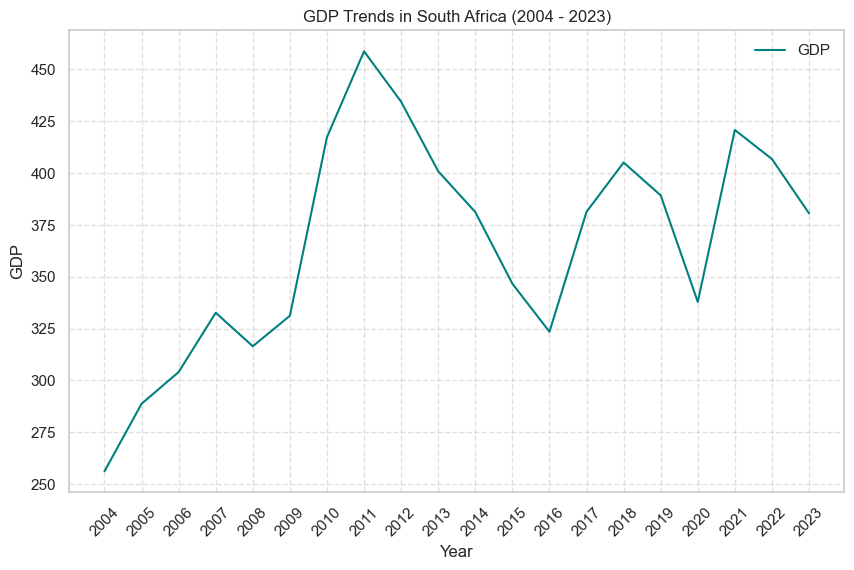

In [84]:
# Visualization of GDP trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=gdp, x='Year', y='GDP', label='GDP', color='teal')  # Set the line color
plt.title('GDP Trends in South Africa (2004 - 2023)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Explicitly set x-axis ticks for years 2004 to 2023
plt.xticks(ticks=range(2004, 2024), rotation=45)  # Use range(2004, 2024) to include 2023

plt.show()

### Trading Partners Analysis

#### Univariate Analysis

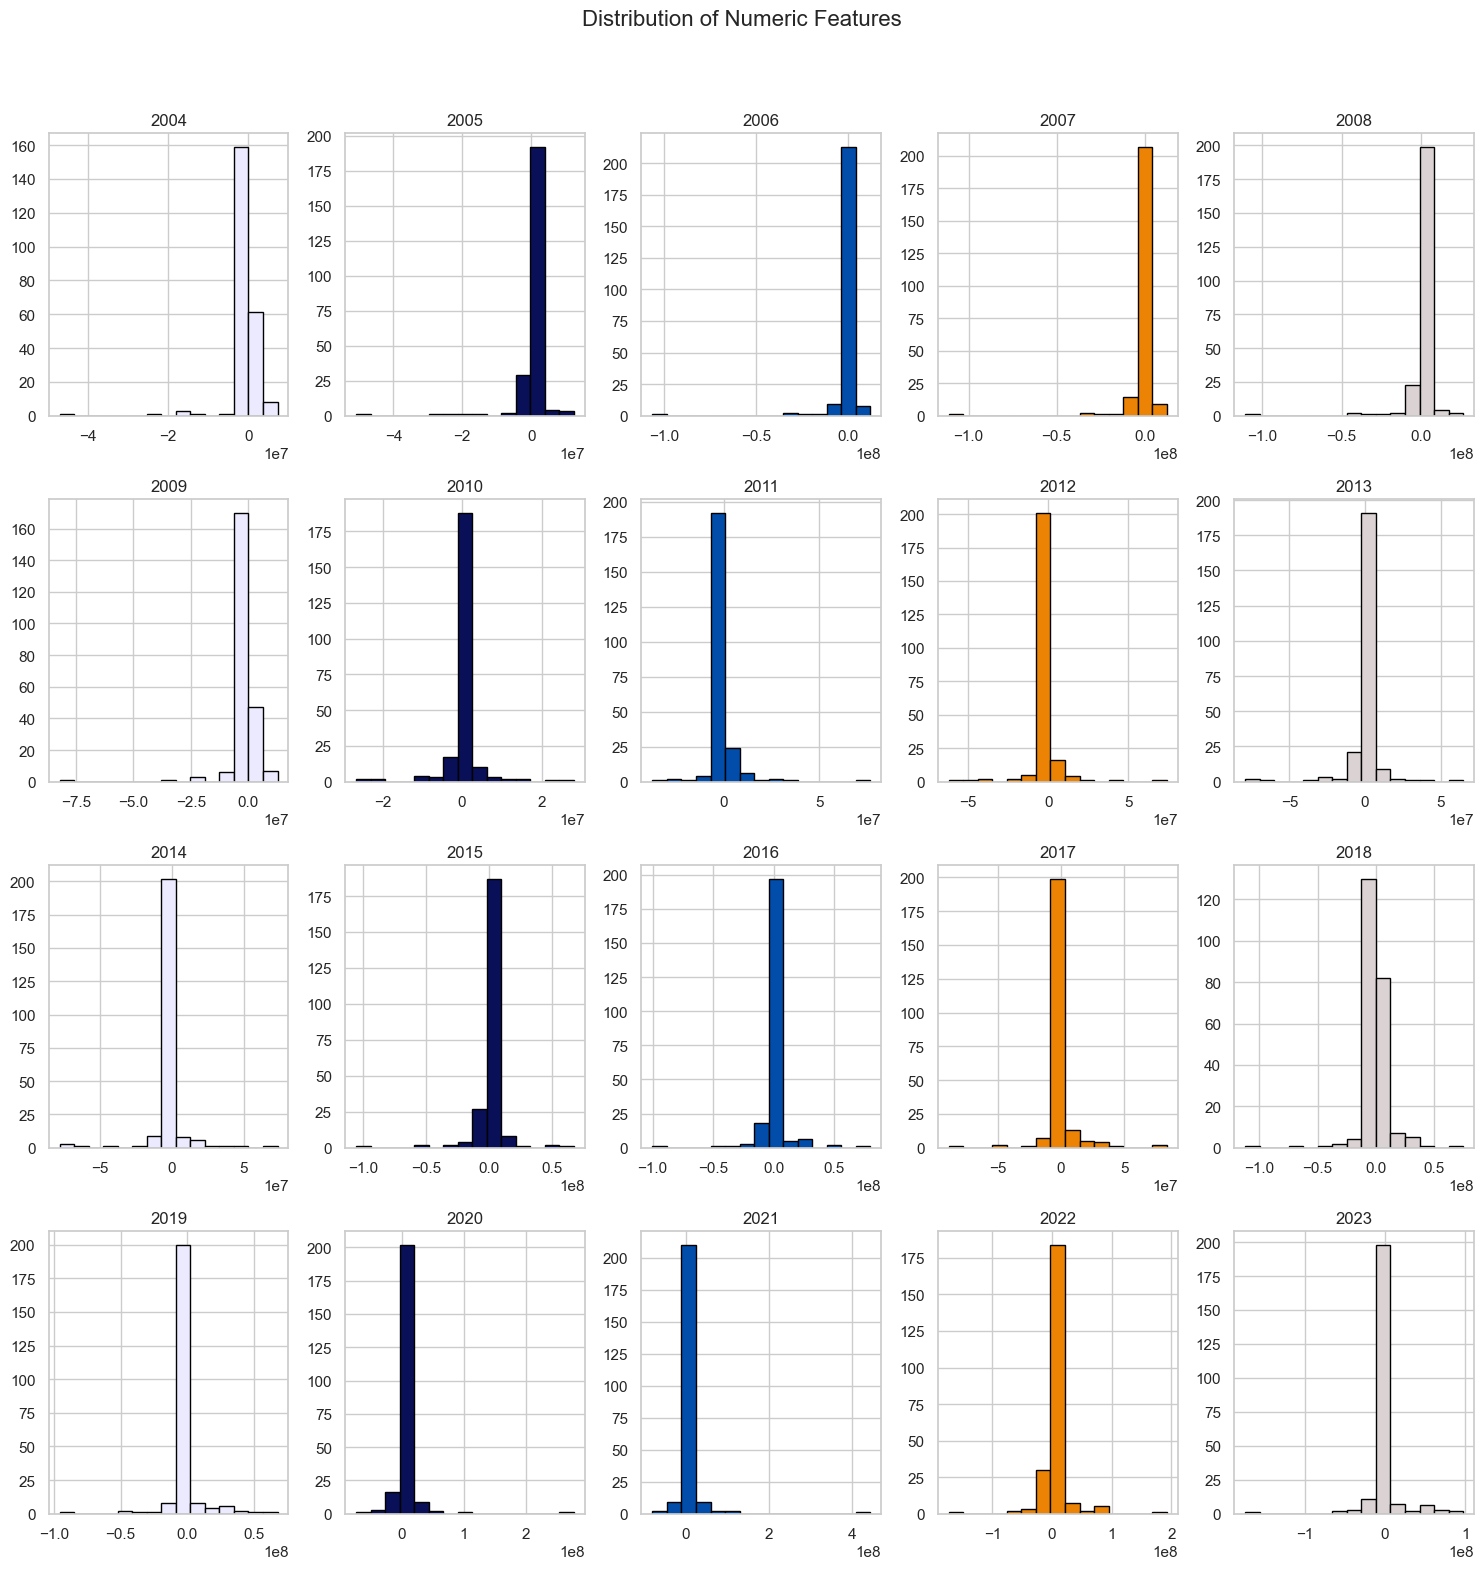

In [87]:
# Define the mixed palette
mixed = ["#EBEAFF", "#091057", "#024CAA", "#EC8305", "#DBD3D3"]

# Get numeric columns
numeric_columns = partners.select_dtypes(include='number').columns

# Calculate the number of rows for the subplots
nrows = math.ceil(len(numeric_columns) / 5)

# Set up the figure
fig, axes = plt.subplots(nrows, ncols=5, figsize=(15, nrows * 4))
axes = axes.flatten()  # Flatten to ensure compatibility regardless of shape

# Loop through each numeric column and plot a histogram with a unique color
for i, (col, color) in enumerate(zip(numeric_columns, mixed * len(numeric_columns))):  # Cycle colors if needed
    partners[col].hist(bins=15, ax=axes[i], color=color, edgecolor='black')
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Add a super title
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

* These histogram subplots illustrates the distribution of trade balances across years (2004–2023). Most trade balances cluster near zero, indicating frequent balanced trade, with fewer extreme surpluses or deficits, especially in recent years.

### Checking for Outliers

Number of Outliers Detected: 1633


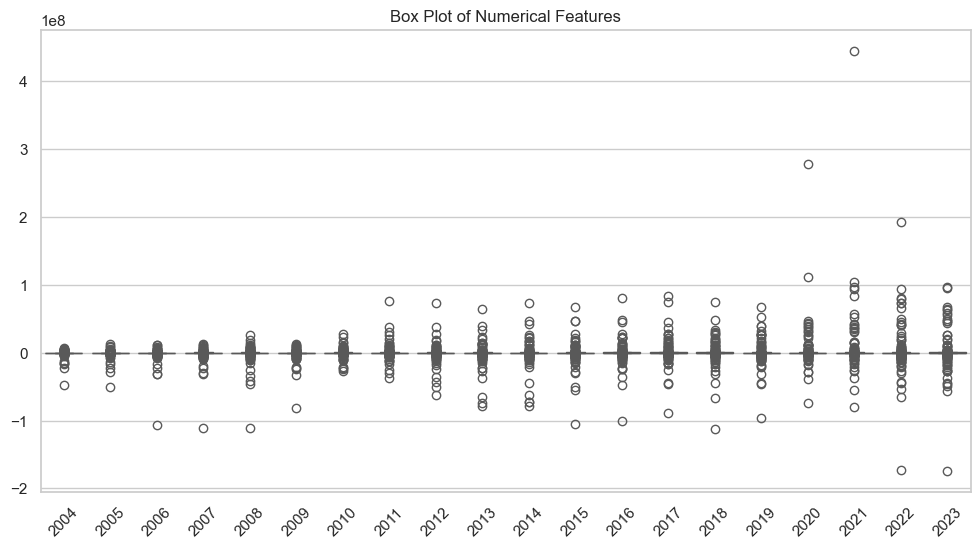

In [88]:
# Identify numerical columns (excluding non-numeric ones)
numerical_cols = partners.select_dtypes(include='number').columns

# Compute the IQR for each numerical column
Q1 = partners[numerical_cols].quantile(0.25)
Q3 = partners[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = partners[
    (partners[numerical_cols] < (Q1 - 1.5 * IQR)) | 
    (partners[numerical_cols] > (Q3 + 1.5 * IQR))
].stack().reset_index()

# Count the number of outliers detected
print(f"Number of Outliers Detected: {outliers.shape[0]}")

# Create a box plot to visualize outliers using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=partners[numerical_cols], palette='Set2')
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

* To explain some of these outliers, we have discovered that we have the "World" as a partner which might be the combination of all the partners. Moreover, we also have a partner called "Area NES"(Areas Not Elsewhere Specified) meaning a combination of unknown regions/special or confidential trade zones/miscellenous regions. And lastly, the rest of the outliers can be explained by the highest positively trading balances for some partners and the lowest negatively trading partners.

In [89]:
#Identify the number of trade balances where countries traded extremely positive or negative with South Africa

# Compute IQR, Q1, and Q3 for numerical columns
Q1 = partners[numerical_cols].quantile(0.25)
Q3 = partners[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count positive and negative outliers
positive_outliers = (partners[numerical_cols] > upper_bound).sum().sum()  # Values above upper bound
negative_outliers = (partners[numerical_cols] < lower_bound).sum().sum()  # Values below lower bound

# Print the results
print(f"Total Positive Outliers: {positive_outliers}")
print(f"Total Negative Outliers: {negative_outliers}")


Total Positive Outliers: 773
Total Negative Outliers: 860


### Trading Balance Analysis

#### World partner check
- To determine if the "World" partner represents the total of all partners or is just another miscellaneous collection

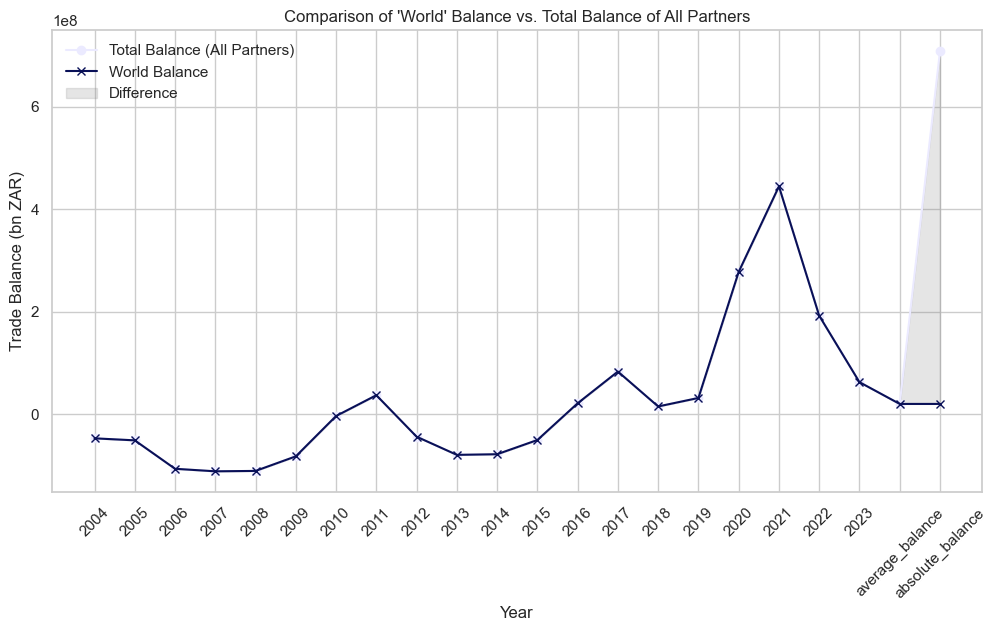

In [95]:
# Rename dataframe for clarity
trade_data = partners.copy()

# Exclude "World" and calculate the total balance across all partners
numerical_cols = trade_data.columns[1:]  # Numerical columns

# Calculate total balance
non_world_data = trade_data[~trade_data.iloc[:, 0].isin(["World"])]
total_balance = non_world_data[numerical_cols].sum()

# Extract the "World" row
world_data = trade_data[trade_data.iloc[:, 0] == "World"][numerical_cols].squeeze()

# Compare the total balance with "World" balance
comparison = pd.DataFrame({
    "Year": numerical_cols,
    "Total Balance (All Partners)": total_balance.values,
    "World Balance": world_data.values
})

# Calculate the difference for each year
comparison["Difference"] = comparison["World Balance"] - comparison["Total Balance (All Partners)"]

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(comparison["Year"], comparison["Total Balance (All Partners)"], 
         label="Total Balance (All Partners)", marker='o')
plt.plot(comparison["Year"], comparison["World Balance"], label="World Balance", marker='x')
plt.fill_between(comparison["Year"], comparison["Total Balance (All Partners)"], 
                 comparison["World Balance"], alpha=0.2, color='gray', label="Difference")

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Trade Balance (bn ZAR)")
plt.title("Comparison of 'World' Balance vs. Total Balance of All Partners")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


* The full overlap of the total balance with the World's balance means that indedd World partner is the total trading balance of all trading partners of South Africa.
* Most significantly high turning points of the trade balance includes 2011, 2017, and 2021.

Number of unique values in 'partners': 235


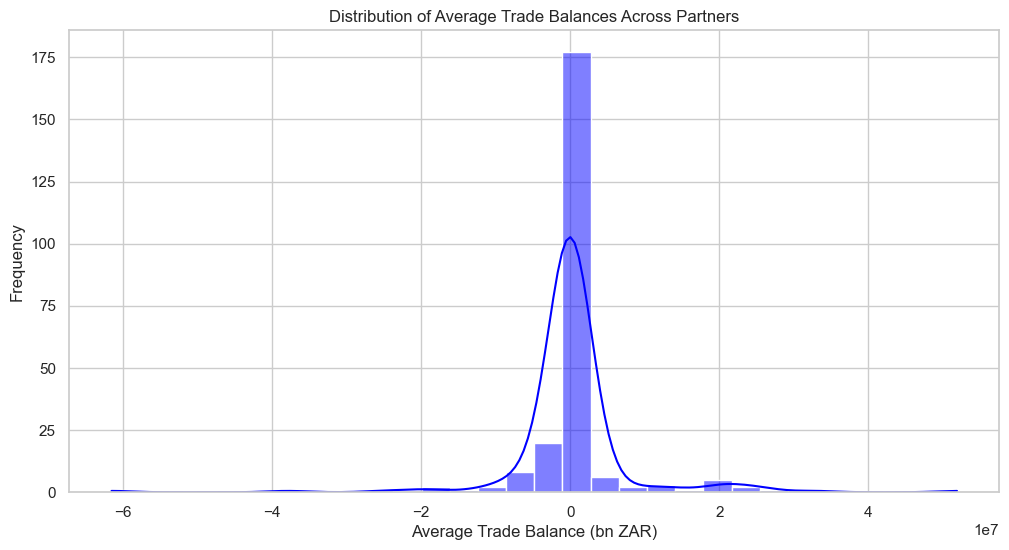

In [96]:

# Unique Partner Count
unique_count = trade_data['partners'].nunique()
print(f"Number of unique values in 'partners': {unique_count}")

# Calculate average trade balance
trade_data['average_balance'] = trade_data.iloc[:, 1:].mean(axis=1)

# Visualization of trade balance distributions
plt.figure(figsize=(12, 6))
sns.histplot(trade_data['average_balance'], kde=True, color='blue', bins=30)
plt.title("Distribution of Average Trade Balances Across Partners")
plt.xlabel("Average Trade Balance (bn ZAR)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



* This distribution extends farther to the left than the right, meaning the data is left-skewed (negatively skewed).The majority of the data is clustered near zero, but there are larger trade deficits (negative balances) with some trading partners compared to the surpluses.

<br/>

* This left-skewed distribution highlights South Africa's reliance on certain imports from specific partners, leading to significant trade deficits. While trade balances near zero suggest stability with many partners, addressing the extreme deficits on the left tail should be a priority for sustainable economic growth.

### Trend Analysis of Positive & Negative Trade Balances

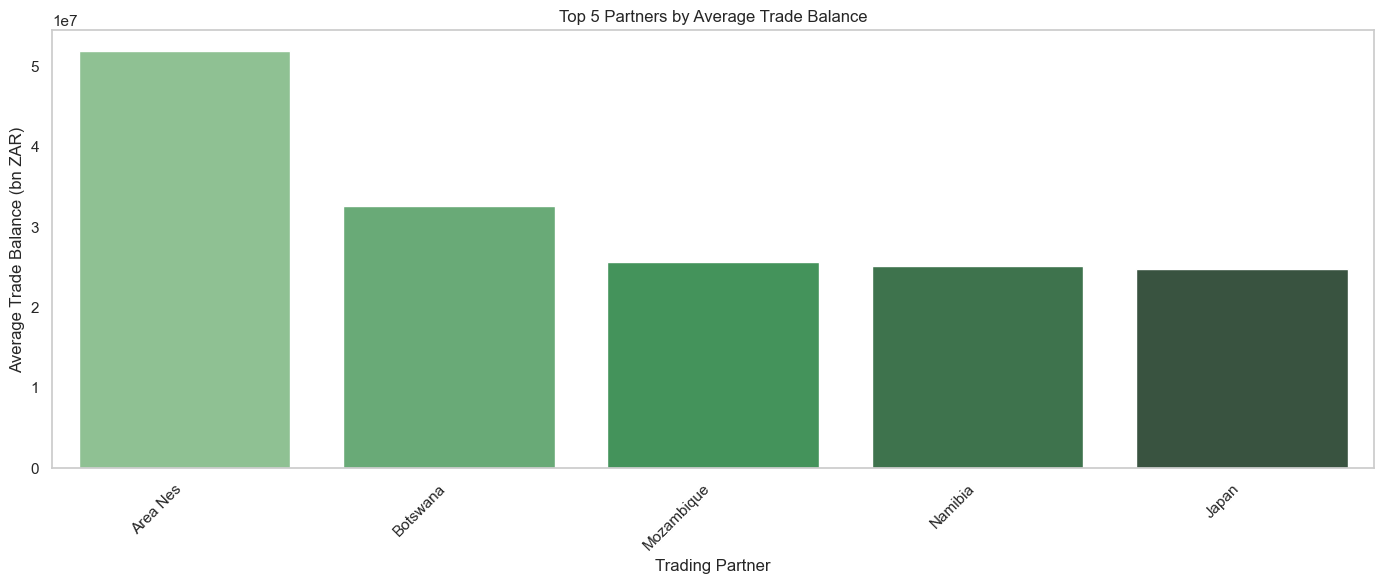

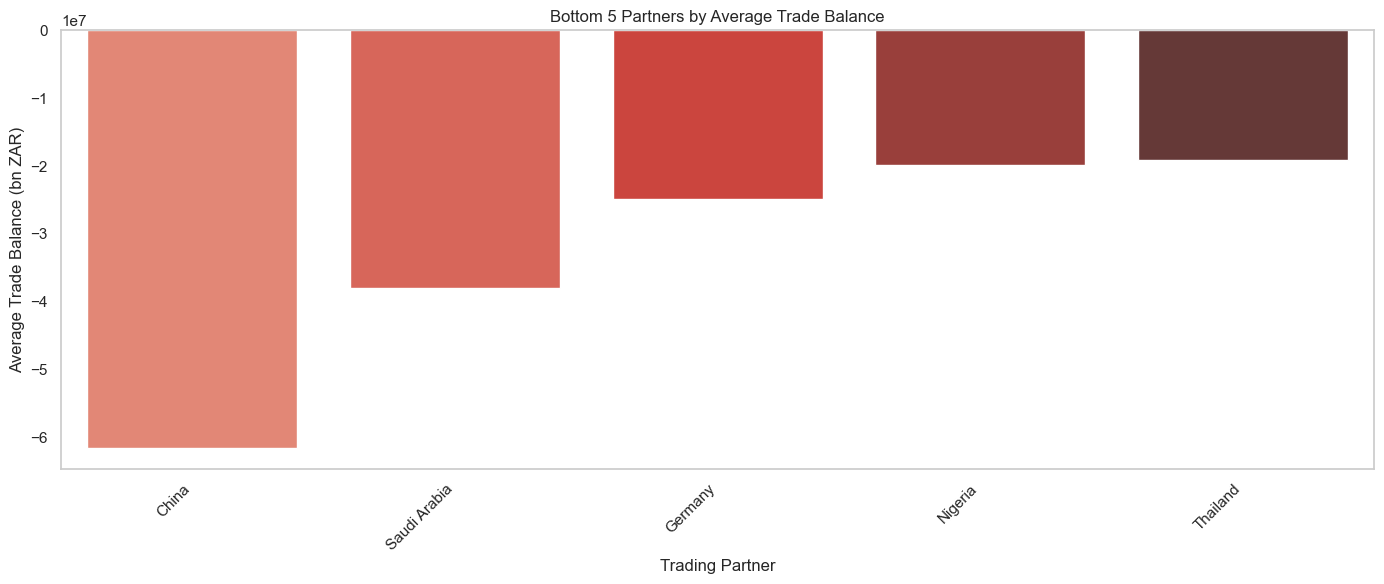

In [99]:
# Analysis of Positive and Negative Balances
# Identify top 5 partners by average trade balance
top_partners = trade_data.sort_values(by='average_balance', ascending=False).head(5)

# Barplot for top 5 partners
plt.figure(figsize=(14, 6))
sns.barplot(x=top_partners['partners'], y=top_partners['average_balance'], palette='Greens_d')
plt.title("Top 5 Partners by Average Trade Balance")
plt.ylabel("Average Trade Balance (bn ZAR)")
plt.xlabel("Trading Partner")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Identify bottom 5 partners by average trade balance
bottom_partners = trade_data.sort_values(by='average_balance', ascending=True).head(5)

# Barplot for bottom 5 partners
plt.figure(figsize=(14, 6))
sns.barplot(x=bottom_partners['partners'], y=bottom_partners['average_balance'], palette='Reds_d')
plt.title("Bottom 5 Partners by Average Trade Balance")
plt.ylabel("Average Trade Balance (bn ZAR)")
plt.xlabel("Trading Partner")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


* Here we identified the top 5 partners with the highest average trade balance and the bottom ones with lowest trade balance

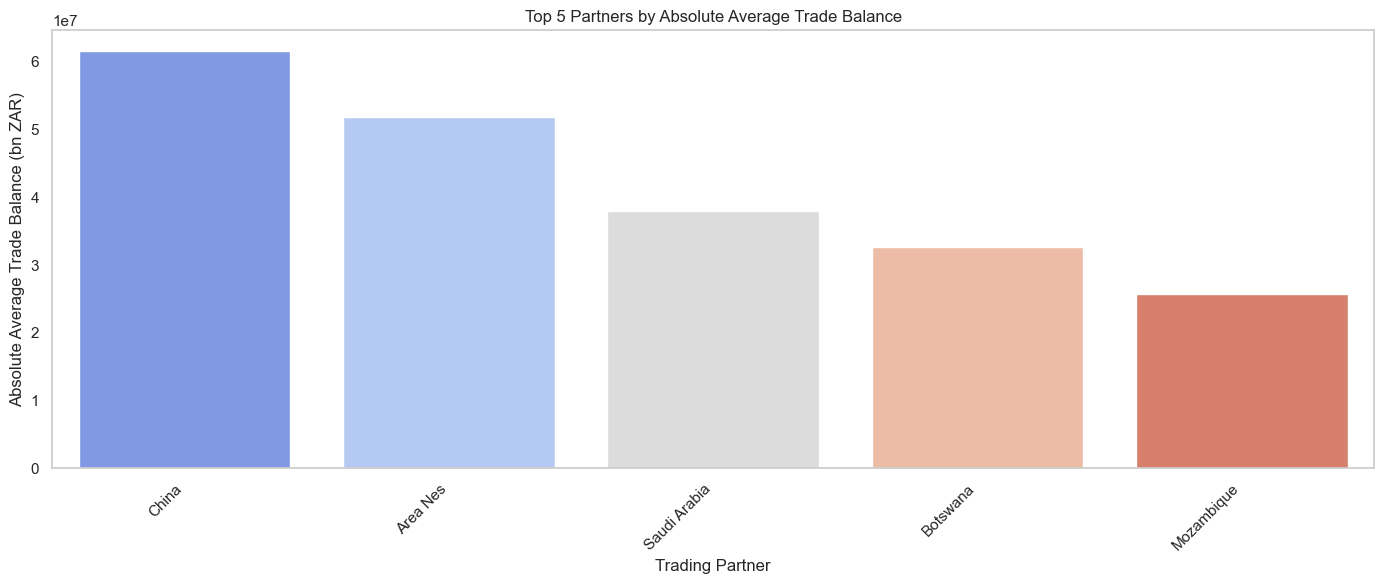

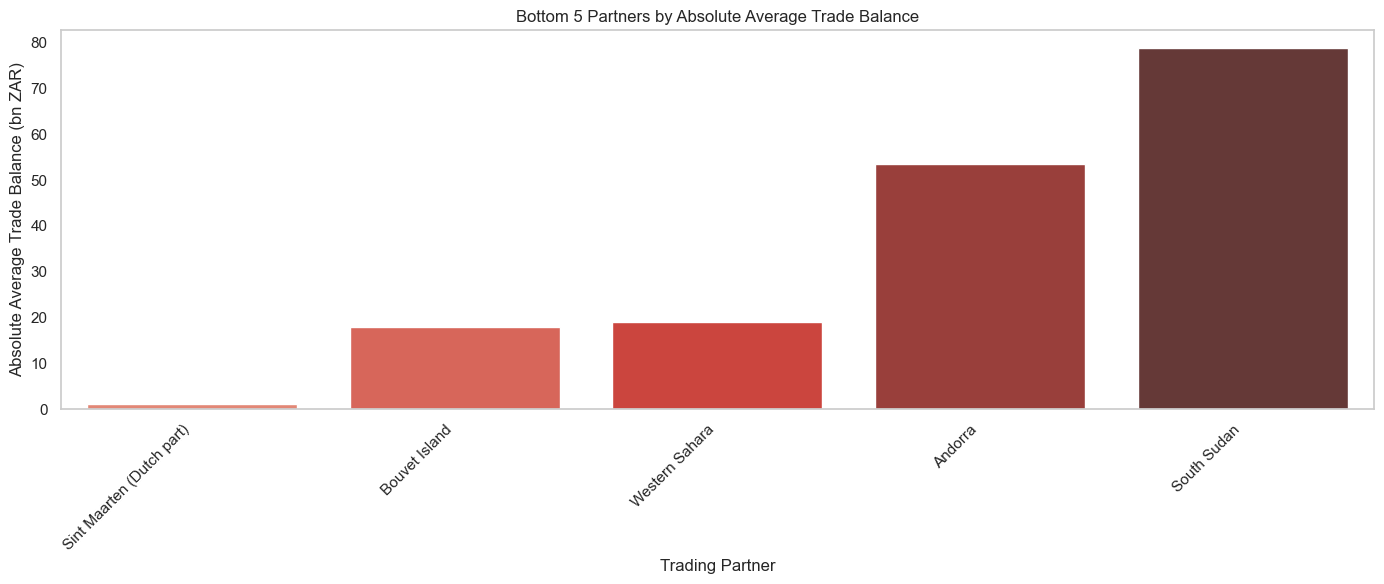

In [102]:
# Absolute Balances
trade_data['absolute_balance'] = trade_data['average_balance'].abs()

# Identify top 5 partners by absolute average trade balance
top_absolute_partners = trade_data.sort_values(by='absolute_balance', ascending=False).head(5)

# Barplot for top 5 partners by absolute average trade balance
plt.figure(figsize=(14, 6))
sns.barplot(x=top_absolute_partners['partners'], y=top_absolute_partners['absolute_balance'], palette='coolwarm')
plt.title("Top 5 Partners by Absolute Average Trade Balance")
plt.ylabel("Absolute Average Trade Balance (bn ZAR)")
plt.xlabel("Trading Partner")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# Identify top 5 partners by absolute average trade balance
bottom_absolute_partners = trade_data.sort_values(by='absolute_balance', ascending=True).head(5)

# Barplot for bottom 5 partners by absolute average trade balance
plt.figure(figsize=(14, 6))
sns.barplot(
    x=bottom_absolute_partners['partners'],  # Use the "partners" column for x-axis
    y=bottom_absolute_partners['absolute_balance'],  # Use the "absolute_balance" column for y-axis
    palette="Reds_d"
)
plt.title("Bottom 5 Partners by Absolute Average Trade Balance")
plt.ylabel("Absolute Average Trade Balance (bn ZAR)")
plt.xlabel("Trading Partner")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


<a id="six"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">6. Modelling</h2>
<hr>
<a id="cont">Back to Table of Contents</a>


* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


Data Preprocessing
1. Extracting and Preparing Data


In [25]:
# Filter for "World"
world_data = partners[partners.iloc[:, 0] == "World"]

# Extract numeric year columns
years = partners.columns[1:]  # Columns representing years
numeric_years = [col for col in years if col.isdigit()]  # Ensure numeric columns

# Convert to a time series
world_ts = world_data[numeric_years].iloc[0].astype(float).T
world_ts.index = list(map(int, numeric_years))  # Convert year strings to integers
world_ts.name = "Trade Balance"  # Name the time series

2. Stationarity Check and Differencing

The Augmented Dickey-Fuller (ADF) test is used to test for stationarity. A stationary time series is required for time series modeling, such as ARIMA.

##### Stationarity Check and Differencing
The Augmented Dickey-Fuller (ADF) test is a statistical test used to check whether a time series is stationary. A stationary time series has properties like constant mean and variance over time, and it is an important assumption for many time series models, including ARIMA.

ADF test helps decide whether the time series needs transformation for stationarity.
A non-stationary series requires differencing (or other transformations like log scaling) to become suitable for time series modeling.

In [26]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
adf_result = adfuller(world_ts)
print(f"ADF Statistic: {adf_result[0]}, p-value: {adf_result[1]}")

# Differencing if non-stationary
if adf_result[1] > 0.05:
    print("Time series is non-stationary. Differencing is required.")
    world_ts_diff = world_ts.diff().dropna()
else:
    print("Time series is stationary. Proceeding without differencing.")
    world_ts_diff = world_ts

# ADF Test after differencing (if applicable)
if adf_result[1] > 0.05:
    result_diff = adfuller(world_ts_diff)
    print(f"ADF Statistic (after differencing): {result_diff[0]}, p-value: {result_diff[1]}")
    if result_diff[1] > 0.05:
        print("Still non-stationary. Further differencing may be required.")
    else:
        print("Time series is now stationary. Proceeding with modeling.")

ADF Statistic: 1.940545962068787, p-value: 0.9985905315900107
Time series is non-stationary. Differencing is required.
ADF Statistic (after differencing): -1.8843008593313164, p-value: 0.3394821383097357
Still non-stationary. Further differencing may be required.


ADF Statistic: 1.940545962068787
- A positive ADF statistic suggests non-stationarity (stationary series typically have negative ADF statistics).

p-value: 0.9985905315900107:
- The p-value is much greater than 0.05, so we fail to reject the null hypothesis. This indicates the time series is non-stationary.

In [28]:
# Apply second-order differencing if necessary
world_ts_diff2 = world_ts_diff.diff().dropna()

# Perform ADF test after second-order differencing
result_diff2 = adfuller(world_ts_diff2)
print(f"ADF Statistic (second differencing): {result_diff2[0]}, p-value: {result_diff2[1]}")

if result_diff2[1] > 0.05:
    print("Still non-stationary after second-order differencing.")
else:
    print("Time series is now stationary after second-order differencing. Proceeding with modeling.")


ADF Statistic (second differencing): -9.222527077200358, p-value: 1.7642141571660925e-15
Time series is now stationary after second-order differencing. Proceeding with modeling.


#### TIME SERIES MODELLING

##### ARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=713.898, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=725.693, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=727.571, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=725.745, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=727.812, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=713.045, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=726.801, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=714.584, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=714.292, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=716.415, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=715.617, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=718.115, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 0.752 seconds
Best ARIMA order: (2, 0, 1)
                               SARIMAX Results                          

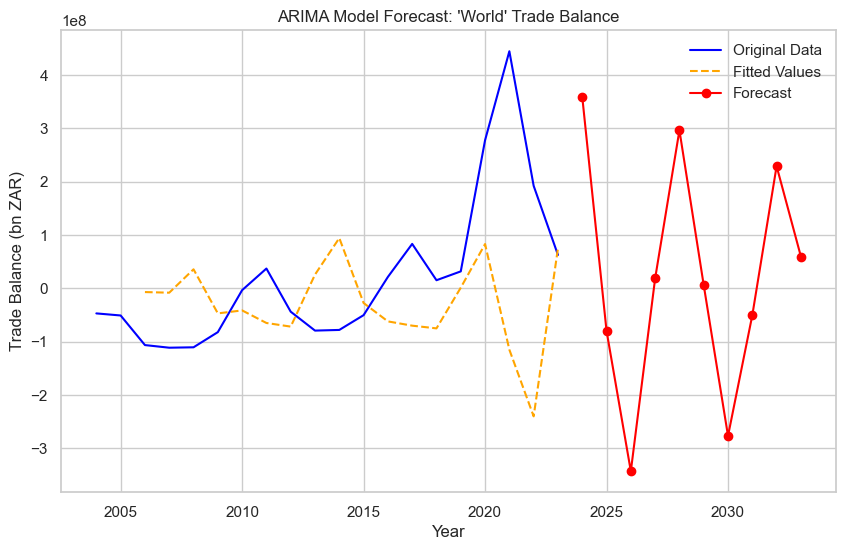

In [41]:
# Auto ARIMA to find the best parameters
auto_model = auto_arima(world_ts_diff2, seasonal=False, stepwise=True, trace=True)
print(f"Best ARIMA order: {auto_model.order}")

# Train ARIMA Model
arima_model = ARIMA(world_ts_diff2, order=auto_model.order)
arima_result = arima_model.fit()
print(arima_result.summary())

# Forecast for the next 10 years
forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)
forecast_years = range(world_ts.index[-1] + 1, world_ts.index[-1] + 1 + forecast_steps)

# Plot ARIMA Results
plt.figure(figsize=(10, 6))
plt.plot(world_ts, label="Original Data", color="blue")
plt.plot(world_ts_diff2.index, arima_result.fittedvalues, linestyle="--", label="Fitted Values", color="orange")
plt.plot(forecast_years, forecast, marker="o", color="red", label="Forecast")
plt.xlabel("Year")
plt.ylabel("Trade Balance (bn ZAR)")
plt.title("ARIMA Model Forecast: 'World' Trade Balance")
plt.legend()
plt.grid(True)
plt.show()


The ARIMA model is forecasting the future trade balance (in billion ZAR) for the "World" partner over the next 10 years. It predicts the trade balance based on historical data, considering trends and patterns in the past trade balances.

#### PARTNER-SPECIFIC PREDICTIONS

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Ensure that 'partners' column is retained when grouping
# Group and compute the mean for all numeric columns (yearly data)
partner_features = partners.groupby('partners').mean()

# Define X (independent variables) and y (target variable)
# Use data from 2004–2022 for training and 2023 for predictions
X = partner_features.iloc[:, :-1]  # Use data from 2004-2022 (all years except 2023)
y = partner_features.iloc[:, -1]   # Use 2023 as the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Linear Regression Model

In [43]:
# 1. Linear Regression Model
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model
lr_predictions = lr_model.predict(X_test)  # Make predictions

# Evaluate the model (e.g., R-squared score, Mean Squared Error)
lr_r2_score = r2_score(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression R-squared score: {lr_r2_score}")
print(f"Linear Regression Mean Squared Error: {lr_mse}")



Linear Regression R-squared score: 1.0
Linear Regression Mean Squared Error: 8.661780468759219e-17


Linear Regression
R-squared score: 1.0
Interpretation: This indicates a perfect fit to the data, meaning the model explains 100% of the variance in the target variable (2023 trade data in this case). While this seems ideal, it's important to check for overfitting, especially since a perfect R-squared score on the test set might suggest the model has learned the data too well, potentially at the expense of generalization to unseen data.
Mean Squared Error (MSE): 8.66e-17
Interpretation: This value is extremely small, almost close to zero, which means the model's predictions are very close to the actual values. Again, this very low value suggests the model fits the data perfectly, which could indicate overfitting.


##### Random Forest Model

In [53]:
# 2. Random Forest Model
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)  # Train the model
rf_predictions = rf_model.predict(X_test)  # Make predictions

# Evaluate the model
rf_r2_score = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)  # Calculate RMSE

print(f"Random Forest R-squared score: {rf_r2_score}")
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest R-squared score: 0.9321678968971829
Random Forest Mean Squared Error: 4872550901156.378
Random Forest RMSE: 2207385.5352331134


Random Forest
R-squared score: 0.9322

Interpretation: This indicates that the Random Forest model explains approximately 93.22% of the variance in the target variable. The model performs well, providing a strong predictive power. It has a good balance between fitting the training data and generalizing to the test data.
Mean Squared Error (MSE): 4.87e12

Interpretation: This is a relatively large MSE compared to the Linear Regression model, which indicates that while the Random Forest model is robust, it doesn't have perfect predictions, and there might be significant error in some predictions. However, the high R-squared score suggests the model is generally effective despite this error.

##### Decision Tree Regressor

In [45]:
# 3. Decision Tree Regressor
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Train the model
dt_predictions = dt_model.predict(X_test)  # Make predictions

# Evaluate the model (e.g., R-squared score, Mean Squared Error)
dt_r2_score = r2_score(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree R-squared score: {dt_r2_score}")
print(f"Decision Tree Mean Squared Error: {dt_mse}")



Decision Tree R-squared score: 0.6978539959994141
Decision Tree Mean Squared Error: 21703908868081.543


Decision Tree Regressor
R-squared score: 0.6979

Interpretation: This model explains about 69.79% of the variance in the target variable. It suggests that the Decision Tree has a lower explanatory power compared to the Random Forest model. It may be overfitting or underfitting, as decision trees are sensitive to the structure of the data.

Mean Squared Error (MSE): 2.17e13

Interpretation: The MSE here is much larger than that of the Random Forest and Linear Regression models, suggesting that the predictions are less accurate and there are larger errors in the model’s output. Decision Trees often struggle with generalization unless properly tuned (e.g., through pruning or hyperparameter optimization).

##### Support Vector Regressor

In [46]:
# 4. Support Vector Regressor
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)  # Train the model
svr_predictions = svr_model.predict(X_test)  # Make predictions

# Evaluate the model (e.g., R-squared score, Mean Squared Error)
svr_r2_score = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f"Support Vector Regressor R-squared score: {svr_r2_score}")
print(f"Support Vector Regressor Mean Squared Error: {svr_mse}")

Support Vector Regressor R-squared score: -0.005864795714864757
Support Vector Regressor Mean Squared Error: 72253803031479.28


Support Vector Regressor (SVR)
R-squared score: -0.0059

Interpretation: The negative R-squared value indicates that the Support Vector Regressor model performs worse than a simple mean prediction. In other words, it does not capture the trend or relationship in the data at all and might be overfitting, underfitting, or facing issues due to scaling, kernel choice, or parameter tuning.

Mean Squared Error (MSE): 7.23e13

Interpretation: The very high MSE confirms that the model’s predictions are highly inaccurate. This result indicates that SVR is not a suitable model for this specific dataset or problem, and it may need parameter adjustments (like kernel selection or scaling) or a different approach altogether.

***

Summary of Model Performance:
Best Model: Linear Regression and Random Forest are the top-performing models, with Linear Regression having a perfect fit but potentially overfitting. Random Forest shows strong predictive power, explaining over 93% of the variance.
Worst Model: Support Vector Regressor shows the worst performance, with negative R-squared and very high MSE, suggesting poor generalization.
Intermediate Model: The Decision Tree performs reasonably well but with significant room for improvement, especially in terms of error reduction.
In conclusion, Linear Regression and Random Forest are your best bets for reliable predictions, with Random Forest being more robust, while SVR should be revisited or excluded from this particular analysis.

<a id="seven"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">7. Evaluation and Validation</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

<a id="eight"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">8. Final Model</h2>
<hr>
<a id="cont">Back to Table of Contents</a>


* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [54]:
# Final Comparison: ARIMA vs Random Forest
# Evaluate ARIMA with RMSE for the same target year (2023)

# Ensure world_ts_diff2 is a DataFrame if mean(axis=1) is needed
if isinstance(world_ts_diff2, pd.Series):
    # If world_ts_diff2 is a Series, just compute the mean directly
    arima_actual = world_ts_diff2.mean()
else:
    # If it's a DataFrame, compute the mean across columns
    arima_actual = world_ts_diff2.mean(axis=1).iloc[-1]

# Forecast for 2023
arima_forecast_2023 = forecast.iloc[0]  # Forecast for 2023
arima_rmse_2023 = np.sqrt(mean_squared_error([arima_actual], [arima_forecast_2023]))

print(f"ARIMA RMSE for 2023: {arima_rmse_2023}")

# Compare RMSE of ARIMA and Random Forest
if rf_rmse < arima_rmse_2023:
    final_model = "Random Forest"
else:
    final_model = "ARIMA"

print(f"The Final Model is: {final_model}")


ARIMA RMSE for 2023: 366172538.07801646
The Final Model is: Random Forest


In [ ]:
# Final Model Summary:
# Forecast for the next 5 years using final model

<a id="nine"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">9. Conclusion and Future Work</h2>
<hr>
<a id="cont">Back to Table of Contents</a>


* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---



**Conclusion:**


**Future Work:**



<a id="ten"></a>
<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; padding: 15px; padding-left: 15px; border-radius: 4px;">10. References</h2>
<hr>
<a id="cont">Back to Table of Contents</a>

---
 - Trade Map: https://www.trademap.org/
 - Statista: https://www.statista.com/statistics/370513/gross-domestic-product-gdp-in-south-africa/


<hr>
<h2 id="background-context" style="color: white; background-color: #466df4; margin: 10px; padding: 15px; text-align: center; border-radius: 4px;">THE END</h2>
<hr>